# Clustering Customers

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

## Showing information related to data

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Features Extraction

In [6]:
x=df.iloc[:,[3,4]].values

## Model selection

In [7]:
from sklearn.cluster import KMeans
wcss=[]

In [8]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

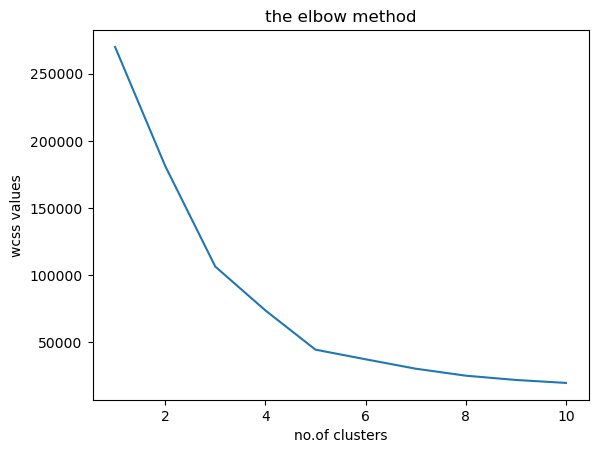

In [9]:
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("no.of clusters")
plt.ylabel("wcss values")
plt.show()

In [10]:
kmeansmodel=KMeans(n_clusters=5,n_init=10,random_state=0)
y_kmeans=kmeansmodel.fit_predict(x)


## Plotting the clusters

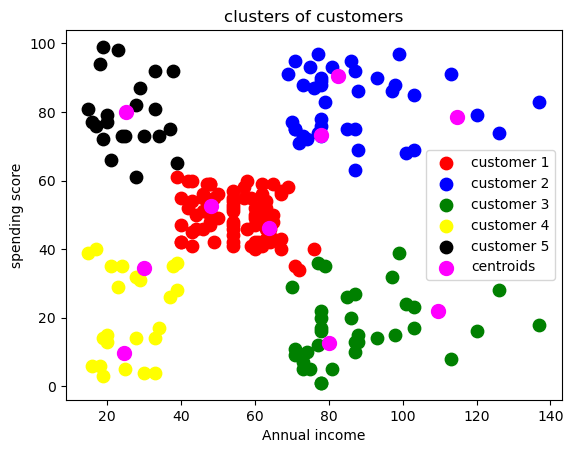

In [18]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80,c="red",label="customer 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80,c="blue",label="customer 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80,c="green",label="customer 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80,c="yellow",label="customer 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80,c="black",label="customer 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="magenta",label="centroids")
plt.title("clusters of customers")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()